<a target="_blank" href="https://colab.research.google.com/github/sonder-art/ia_p25/blob/main/curso/temas/01_razonamiento/preferencias_sencillas.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 1. Imports & Setup

In [1]:
# ================================================
# Celda 1: Importaciones y Configuración
# ================================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
# Explicación:
# Importamos las bibliotecas para graficar y manipular datos.
# Solo necesitamos estas dos para representar las preferencias.


# 2: Funciones Auxiliares (Validador de la Base de Conocimientos)

In [2]:
# ================================================
# Celda 2: Funciones Auxiliares (Validador, etc.)
# ================================================

def validate_preferences(preferences, possible_places):
    """
    validate_preferences(preferences, possible_places):
        - preferences: Diccionario que representa las preferencias de cada persona.
        - possible_places: Lista de lugares posibles para ir a comer.

    Esta función se asegura de:
        1. Que haya al menos dos personas (2 <= n).
        2. Que cada persona proporcione una preferencia para cada lugar de possible_places.
        3. Que las preferencias coincidan con la lista de lugares conocidos.

    Retorna:
        - True, si todas las preferencias son válidas.
        - False, si hay algún error; imprime mensajes de error específicos.
    
    GOFAI / Explicación Simbólica:
        - Preparamos nuestra "Base de Conocimientos" con hechos:
          "Cada persona tiene 5 (o n) preferencias que corresponden a la lista de lugares."
        - Este método verifica la consistencia de esos hechos.
    """
    if len(preferences) < 2:
        print("ERROR: Se necesitan al menos 2 personas para tomar la decisión.")
        return False

    required_number_of_places = len(possible_places)
    for person_name, pref_list in preferences.items():
        if len(pref_list) != required_number_of_places:
            print(f"ERROR: La persona '{person_name}' no proporcionó exactamente "
                  f"{required_number_of_places} preferencias.")
            return False
        
        for place in pref_list:
            if place not in possible_places:
                print(f"ERROR: La persona '{person_name}' incluyó un lugar desconocido '{place}'.")
                return False

    #print("¡Todas las preferencias han sido validadas correctamente!")
    return True

def visualize_preferences(preferences, possible_places):
    """
    Muestra dos gráficas de barras:
    1) Conteo de cuántas veces cada lugar es la primera preferencia.
    2) Conteo de cuántas veces cada lugar es la última preferencia.

    GOFAI / Explicación:
        - Aunque trabajamos con un sistema simbólico de inferencia,
          tener estadísticas básicas de primera y última opción nos 
          da una visión clara de extremos.
    """
    # Inicializar contadores
    first_choice_count = {place: 0 for place in possible_places}
    last_choice_count = {place: 0 for place in possible_places}

    for person, pref_list in preferences.items():
        # Conteo de primera preferencia
        first_choice_count[pref_list[0]] += 1
        # Conteo de última preferencia
        last_choice_count[pref_list[-1]] += 1
    
    # --- Gráfica para la primera preferencia ---
    fig, ax = plt.subplots(1, 2, figsize=(12,5))

    # Subplot: primera preferencia
    places = list(first_choice_count.keys())
    counts_first = [first_choice_count[p] for p in places]
    ax[0].bar(places, counts_first, color='lightgreen', edgecolor='black')
    ax[0].set_xlabel("Lugares")
    ax[0].set_ylabel("Conteo")
    ax[0].set_title("Veces que cada lugar es PRIMERA opción")
    for i, v in enumerate(counts_first):
        ax[0].text(i, v + 0.1, str(v), ha='center')

    # Subplot: última preferencia
    counts_last = [last_choice_count[p] for p in places]
    ax[1].bar(places, counts_last, color='salmon', edgecolor='black')
    ax[1].set_xlabel("Lugares")
    ax[1].set_ylabel("Conteo")
    ax[1].set_title("Veces que cada lugar es ÚLTIMA opción")
    for i, v in enumerate(counts_last):
        ax[1].text(i, v + 0.1, str(v), ha='center')

    plt.tight_layout()
    plt.show()

def plot_all_ranks_distribution(preferences, possible_places):
    """
    Muestra cuántas veces cada lugar aparece en cada posición de preferencia.
    Creará una gráfica de barras agrupadas (una barra por posición para cada lugar).
    """
    n_places = len(possible_places)
    # Inicializamos un contador para cada lugar en cada posición
    rank_count = {}
    for place in possible_places:
        for rank_pos in range(n_places):
            rank_count[(place, rank_pos)] = 0

    # Contamos cuántas veces cada lugar aparece en cada posición
    for person_name, pref_list in preferences.items():
        for i, place in enumerate(pref_list):
            rank_count[(place, i)] += 1

    # Graficar
    fig, ax = plt.subplots(figsize=(10,5))
    x = np.arange(len(possible_places))
    bar_width = 0.1
    colors = plt.cm.viridis(np.linspace(0,1,n_places))

    for rank_pos in range(n_places):
        counts = [rank_count[(place, rank_pos)] for place in possible_places]
        ax.bar(x + rank_pos*bar_width, counts, width=bar_width, color=colors[rank_pos],
               label=f"Posición {rank_pos+1}")

    ax.set_xticks(x + bar_width*(n_places-1)/2)
    ax.set_xticklabels(possible_places)
    ax.set_xlabel("Lugares")
    ax.set_ylabel("Frecuencia (posiciones)")
    ax.set_title("Distribución de Lugares por TODAS las Posiciones de Preferencia")
    ax.legend()
    plt.show()

def compute_average_rank(preferences, possible_places):
    """
    Calcula el ranking promedio de cada lugar.
    Un ranking bajo (cercano a 1) es más popular (mejor).
    """
    place_sums = {place: 0 for place in possible_places}
    place_counts = {place: 0 for place in possible_places}
    
    for person, prefs in preferences.items():
        for rank_pos, place in enumerate(prefs):
            # (rank_pos + 1) => 1 indica mejor posición, 
            # 2 la siguiente, etc.
            place_sums[place] += (rank_pos + 1)
            place_counts[place] += 1
    
    place_avg = {}
    for place in possible_places:
        if place_counts[place] > 0:
            place_avg[place] = place_sums[place] / place_counts[place]
        else:
            place_avg[place] = None
    
    return place_avg

def visualize_average_rank(preferences, possible_places):
    """
    Calcula y grafica el ranking promedio de cada lugar.
    """
    avg_ranks = compute_average_rank(preferences, possible_places)
    # Ordenar de menor a mayor (menor = mejor)
    sorted_places = sorted(avg_ranks.items(), key=lambda x: x[1])
    
    labels = [sp[0] for sp in sorted_places]
    values = [sp[1] for sp in sorted_places]

    plt.figure(figsize=(8,4))
    bars = plt.bar(labels, values, color='lightblue', edgecolor='black')
    plt.xlabel("Lugares")
    plt.ylabel("Ranking promedio")
    plt.title("Ranking promedio (1 = lugar más popular)")
    # Mostrar valor encima de cada barra
    for b in bars:
        height = b.get_height()
        plt.text(b.get_x() + b.get_width()/2, height + 0.05,
                 f"{height:.2f}", ha='center')

    plt.ylim(0, max(values) + 1)
    plt.show()




In [3]:
def validate_preferences(preferences, possible_places):
    """
    Verifica que las preferencias sean válidas:
    - Al menos 2 personas
    - Mismo número de preferencias que lugares
    - Lugares válidos
    """
    if len(preferences) < 2:
        print("ERROR: Se necesitan al menos 2 personas.")
        return False

    required_places = len(possible_places)
    for person, prefs in preferences.items():
        if len(prefs) != required_places:
            print(f"ERROR: {person} no tiene {required_places} preferencias.")
            return False
        for place in prefs:
            if place not in possible_places:
                print(f"ERROR: {person} incluyó un lugar desconocido {place}.")
                return False

    return True


def generate_random_preferences(num_people, possible_places):
    """
    Genera un diccionario de preferencias aleatorias para 'num_people' personas.
    Cada persona tendrá una permutación de possible_places.
    """
    preferences = {}
    for i in range(num_people):
        person_name = f"Persona_{i+1}"
        random_prefs = random.sample(possible_places, len(possible_places))
        preferences[person_name] = random_prefs
    return preferences

def compute_borda_scores(preferences, possible_places):
    """
    Calcula la puntuación Borda de cada lugar en 'possible_places' 
    dadas las preferencias (diccionario persona -> lista de lugares).

    Borda (versión simple):
    - Si hay n lugares, la 1ra preferencia (posición 0) recibe n-1 puntos,
      la 2da preferencia (posición 1) recibe n-2, etc.
    - Retorna un diccionario con {lugar: puntaje_borda}.
    """
    n = len(possible_places)
    borda_scores = {place: 0 for place in possible_places}

    for person, ranking in preferences.items():
        for i, place in enumerate(ranking):
            borda_scores[place] += (n - 1 - i)
    
    return borda_scores


def borda_winner(preferences, possible_places):
    """
    Determina el ganador Borda: el lugar con la mayor puntuación total.
    """
    scores = compute_borda_scores(preferences, possible_places)
    return max(scores, key=scores.get)


def pairwise_matrix(preferences, possible_places):
    """
    Retorna una matriz (diccionario) pairwise_count[x][y] que indica
    cuántas personas prefieren 'x' sobre 'y' en un duelo directo (x vs. y).
    """
    pairwise_count = {x: {y: 0 for y in possible_places} for x in possible_places}

    for person, ranking in preferences.items():
        # Si x aparece antes que y en 'ranking', se incrementa pairwise_count[x][y].
        for i, x in enumerate(ranking):
            for j in range(i+1, len(ranking)):
                y = ranking[j]
                pairwise_count[x][y] += 1

    return pairwise_count


def find_condorcet_winner(preferences, possible_places):
    """
    Chequea si existe un lugar que gane contra todos los demás en duelos directos 
    (Condorcet Winner).
    Retorna:
      - El lugar que es Condorcet Winner, si existe.
      - None, si no hay tal lugar (hay un ciclo o nadie domina a todos).
    """
    pw_matrix = pairwise_matrix(preferences, possible_places)

    for x in possible_places:
        wins_all = True
        for y in possible_places:
            if x == y:
                continue
            if pw_matrix[x][y] <= pw_matrix[y][x]:
                wins_all = False
                break
        if wins_all:
            return x
    return None

def analyze_engine_coincidence(df_sims):
    """
    Dado un DataFrame con columnas (al menos):
      - 'winner_engine': Ganador según el inference_engine.
      - 'winner_borda': Ganador Borda.
      - 'winner_condorcet': Ganador Condorcet (o None si no existe).

    Retorna un dict con:
      - 'engine_borda_coincidence': % de simulaciones donde engine == Borda.
      - 'engine_condorcet_coincidence': % de simulaciones donde engine == Condorcet,
        en aquellas simulaciones que tienen un condorcet winner (no None).
    """
    total_sims = len(df_sims)
    if total_sims == 0:
        return {
            "engine_borda_coincidence": 0.0,
            "engine_condorcet_coincidence": 0.0
        }

    same_borda = (df_sims["winner_engine"] == df_sims["winner_borda"]).sum()
    coincide_borda_pct = same_borda / total_sims

    df_condorcet = df_sims.dropna(subset=["winner_condorcet"])  # simulaciones c/ condorcet
    if len(df_condorcet) > 0:
        same_condorcet = (df_condorcet["winner_engine"] == df_condorcet["winner_condorcet"]).sum()
        coincide_condorcet_pct = same_condorcet / len(df_condorcet)
    else:
        coincide_condorcet_pct = 0.0

    return {
        "engine_borda_coincidence": coincide_borda_pct,
        "engine_condorcet_coincidence": coincide_condorcet_pct
    }


In [4]:
def analyze_winner_volatility(df_sims):
    """
    Calcula cuántas veces el 'winner' cambia entre una simulación y la siguiente
    (simulations consecutivas según 'simulation_id').
    
    Parámetros:
        df_sims: DataFrame con columnas ["simulation_id", "winner"].
                 Debe estar al menos ordenable por 'simulation_id'.
    
    Retorna:
        volatility (float): Valor entre 0 y 1 indicando el porcentaje de cambios
                            de un ganador a otro entre corridas consecutivas.
    """
    # Asegurarse de que esté ordenado por simulation_id
    df_ordered = df_sims.sort_values("simulation_id")
    
    winners = df_ordered["winner"].values
    changes = 0
    
    for i in range(1, len(winners)):
        if winners[i] != winners[i-1]:
            changes += 1
    
    # Calcular fracción de cambios
    if len(winners) > 1:
        volatility = changes / (len(winners) - 1)
    else:
        volatility = 0
    
    return volatility

def compute_hhi_winners(df_sims):
    """
    Calcula el índice Herfindahl-Hirschman (HHI) para la distribución de ganadores.
    
    Parámetros:
        df_sims: DataFrame con columna ["winner"].
        
    Retorna:
        hhi (float): suma de (proporción de victorias de cada lugar)^2
    """
    winner_counts = df_sims["winner"].value_counts()
    total = winner_counts.sum()
    proportions = winner_counts / total
    hhi = (proportions**2).sum()
    return hhi

def compute_winner_utility(prefs, winner, possible_places):
    """
    Dada una asignación de preferencias `prefs` (diccionario persona -> lista de lugares),
    y sabiendo quién ganó (`winner`), calcula la utilidad agregada de ese ganador según:
       Utilidad(persona) = N - index_del_winner_en_sus_preferencias
    donde N = len(possible_places).
    
    Retorna:
        total_utility (int): La suma de utilidades de todas las personas.
    """
    N = len(possible_places)
    total_utility = 0

    for person, ranking in prefs.items():
        index_of_winner = ranking.index(winner)
        total_utility += (N - index_of_winner)
    
    return total_utility

def plot_winner_utility_distribution(df_sims):
    """
    Muestra un histograma de la columna 'winner_utility'.
    Parámetros:
        df_sims: DataFrame con al menos la columna "winner_utility".
    """
    plt.figure(figsize=(7, 4))
    df_sims["winner_utility"].plot(kind="hist", bins=20, color="lightblue", edgecolor="black")
    plt.title("Distribución de la Utilidad Agregada del Ganador")
    plt.xlabel("Utilidad Agregada")
    plt.ylabel("Frecuencia")
    plt.show()
    
    # Podemos imprimir además estadísticas básicas
    mean_util = df_sims["winner_utility"].mean()
    std_util = df_sims["winner_utility"].std()
    print(f"Utilidad media: {mean_util:.2f}, desvío estándar: {std_util:.2f}")

import seaborn as sns
import seaborn as sns

def boxplot_winner_utility_by_place(df_sims):
    """
    Crea un boxplot de 'winner_utility' segmentado por 'winner'.
    Parámetros:
        df_sims: DataFrame con columnas ["winner", "winner_utility"].
    """
    plt.figure(figsize=(7,5))
    sns.boxplot(x="winner", y="winner_utility", data=df_sims, palette="pastel")
    plt.title("Distribución de la Utilidad del Ganador, Segmentada por Lugar Ganador")
    plt.xlabel("Lugar Ganador")
    plt.ylabel("Utilidad Agregada")
    plt.show()
    
def correlation_heatmap(df_sims):
    """
    Crea un mapa de calor (heatmap) de las correlaciones entre las columnas numéricas
    del DataFrame df_sims.
    """
    numeric_df = df_sims.select_dtypes(include=[float, int])  # solo columnas numéricas
    corr_matrix = numeric_df.corr()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de Correlación de Métricas de Simulación")
    plt.show()

def summary_by_winner(df_sims):
    """
    Retorna un DataFrame resumen con estadísticas agregadas por cada lugar que ganó.
    - count (# de victorias)
    - mean y std de winner_utility
    - mean de tie_in_first_pref (qué fracción de las veces ganó cuando hubo empate)
    
    Ajusta las columnas según tus necesidades.
    """
    # Verificamos cuáles columnas existen
    agg_dict = {}
    if "winner_utility" in df_sims.columns:
        agg_dict["winner_utility"] = ["mean", "std", "min", "max"]
    if "tie_in_first_pref" in df_sims.columns:
        agg_dict["tie_in_first_pref"] = ["mean"]
    
    # Groupby por 'winner'
    summary = df_sims.groupby("winner").agg(agg_dict)
    
    return summary


In [ ]:
def compute_winner_utility(prefs, winner, possible_places):
    """
    Calcula la utilidad total del 'winner':
    Utilidad(persona) = N - index(winner), donde N = len(possible_places).
    """
    N = len(possible_places)
    total_utility = 0
    for person, ranking in prefs.items():
        index_of_winner = ranking.index(winner)
        total_utility += (N - index_of_winner)
    return total_utility


def run_single_simulation(num_people, possible_places):
    """
    1. Genera preferencias aleatorias.
    2. Valida.
    3. Llama a inference_engine para decidir su ganador (winner_engine).
    4. Calcula Borda y Condorcet.
    5. Calcula la 'winner_utility' según el engine.
    6. Retorna un diccionario con todos los datos (columnas) a guardar en el DataFrame.
    """
    # (1) Generar preferencias
    prefs = generate_random_preferences(num_people, possible_places)

    # (2) Validar
    valid = validate_preferences(prefs, possible_places)
    if not valid:
        return None

    # (3) Ganador según inference_engine
    chosen_engine = inference_engine(prefs, possible_places)

    # (4) Ganadores Borda y Condorcet
    chosen_borda = borda_winner(prefs, possible_places)
    chosen_condorcet = find_condorcet_winner(prefs, possible_places)  # puede ser None

    # (5) Calcular utilidad del engine
    w_utility = compute_winner_utility(prefs, chosen_engine, possible_places)

    # (6) Guardar la info en un dict
    sim_data = {
        "preferences": prefs,
        "winner_engine": chosen_engine,
        "winner_borda": chosen_borda,
        "winner_condorcet": chosen_condorcet,
        "winner_utility": w_utility
    }
    return sim_data


def run_many_simulations(num_runs, num_people, possible_places):
    """
    Ejecuta 'num_runs' simulaciones con 'num_people' personas y 'possible_places'.
    Retorna un DataFrame con columnas:
      - simulation_id
      - preferences
      - winner_engine
      - winner_borda
      - winner_condorcet (None si no existe)
      - winner_utility
    """
    records = []
    for i in range(num_runs):
        sim_data = run_single_simulation(num_people, possible_places)
        if sim_data is not None:
            sim_data["simulation_id"] = i + 1
            records.append(sim_data)

    df_sims = pd.DataFrame(records)
    return df_sims


#  3: Inference Engine (Esqueleto de Reglas IF-THEN)

In [5]:
# ================================================
# Celda 3: Inference Engine (Esqueleto IF-THEN)
# ================================================

def inference_engine(preferences, possible_places):
    """
    inference_engine(preferences, possible_places):
        - preferences: Diccionario validado de las preferencias de cada persona.
        - possible_places: Lista de lugares conocidos.

    Descripción de Entradas (Inputs):
      - 'preferences' es un diccionario como:
          {
            "Persona_1": [lugarA, lugarB, ...],
            "Persona_2": [lugarC, lugarB, ...],
            ...
          }
      - 'possible_places' es una lista con todos los lugares disponibles, ej:
          ["tacos", "ramen", "pizza", "tortas", "hamburguesas"]
    
    Descripción de Salida (Output):
      - Regresa un string con el lugar seleccionado (ej. "tacos").

    Explicación GOFAI:
        - Este método representa la "lógica simbólica" del sistema.
        - Las reglas IF-THEN se pueden describir así:
          EJEMPLO:
            IF la mayoría prefiere X en primer lugar THEN vamos a X
            ELSE si hay un empate, usar la preferencia #2, etc.
    
    ¡IMPORTANTE!
    - Los estudiantes deben modificar la lógica interna de esta función
      para que refleje su estrategia de decisión.
    - Pueden usar reglas más complejas, ponderaciones,
      o cualquier enfoque basado en condiciones IF-THEN.

    Retorna:
      - El nombre del lugar escogido.
    """

    # ========= EJEMPLO MUY SENCILLO DE LÓGICA POR VOTACIÓN DE PRIMERA PREFERENCIA =========
    # 1) Contamos la cantidad de veces que cada lugar aparece como primera preferencia
    place_votes = {place: 0 for place in possible_places}
    for person, pref_list in preferences.items():
        top_pref = pref_list[0]     # primera preferencia
        place_votes[top_pref] += 1  # sumamos voto

    # 2) Buscamos el lugar con mayor número de votos
    winner, max_votes = None, -1
    for place, votes in place_votes.items():
        if votes > max_votes:
            winner = place
            max_votes = votes

    # 3) Si hubiera un empate, aquí podemos agregar más reglas:
    #    - Ejemplo: usar la segunda preferencia para desempatar
    #    - O bien, asignar distintos pesos por persona, etc.

    return winner


## Explicacion del metodo para agregar



Esta celda explica la lógica actual del **`inference_engine`** (Celda 3) de manera más detallada.

1. **Recorremos todas las personas** y extraemos su **primera preferencia** (`pref_list[0]`).
2. **Llevamos un conteo** (`place_votes`) de cuántas veces aparece cada lugar como **#1**.
3. **Determinamos** cuál es el lugar que tiene el **mayor conteo** de primeras preferencias.
4. **Retornamos** ese lugar como **`winner`**.

> **Nota:** Este método es intencionalmente simple para ilustrar la idea de un sistema simbólico basado en **IF-THEN**. En la práctica (o como ejercicio), se pueden añadir:
> - **Reglas de desempate** (ej. segundas preferencias).
> - **Reglas de prioridad** (ej. una persona tiene doble voto).
> - **Reglas de veto** ("si alguien odia el lugar, descártalo").
> - **Otros criterios** (ej. presupuesto, cercanía, salud, etc.).

La intención es que el estudiante **copie y pegue** la definición de la función **`inference_engine`** (Celda 3) en un chatbot (ej. ChatGPT) junto con su **explicación en lenguaje natural** de cómo debe funcionar su lógica de decisión, y reciba una versión **mejorada/ajustada** de la función.


## Objetivo del ejercicio


**Objetivo del Ejercicio**:  
Decidir a dónde ir a comer basándose en las preferencias de un grupo de personas.

1. **Revisa la celda** `inference_engine` **(Celda 3)** y **modifica las reglas IF-THEN**  
   para que se ajusten a tu **estrategia de decisión**. Puede ser tan **simple o compleja**  
   como quieras.

2. **Una vez que tengas tu propia lógica**, **copia y pega** la función  
   `inference_engine` *(junto con tu explicación en lenguaje natural)* en un **chatbot**  
   (por ejemplo, **ChatGPT**). **Pídele al chatbot** que **revise/optimice** y **tenga en cuenta**  
   tus **condiciones para la toma de decisión**.

3. **Vuelve a pegar la respuesta del chatbot** en la misma función (u otra) y **experimenta**  
   hasta que logres la **lógica deseada**.

4. **Agrega reglas de desempate y prioridades.**  
   **Ejemplo**:
   - "Si dos lugares empatan en **primeras preferencias**, contar cuántas veces aparecen  
     en **segunda preferencia**."
   - "Cada persona puede tener un **'peso' distinto**. Ej. la persona que cumple años  
     tiene **doble voto**."



## Sugerencias de Prompt Engineering



A continuación, algunos **consejos y ejemplos** que puedes **copiar y pegar** (o adaptar) al trabajar con un **chatbot** (p. ej., **ChatGPT**) para **mejorar tu `inference_engine`**:

### 1. Proporciona contexto:

> "Tengo una función llamada `inference_engine` que decide **dónde ir a comer** basándose en las preferencias de un grupo de personas. Cada persona tiene un **orden de preferencia** para varios lugares. **Quiero agregar reglas de desempate y ponderación**. ¿Podrías ayudarme a **mejorar la lógica IF-THEN**?"

### 2. Explica tu lógica en lenguaje natural antes de pedir que el chatbot la codifique:

> "Quiero que si hay un **empate en la primera preferencia**, se **revise la segunda preferencia**. Si hay un nuevo empate, **revisar la tercera**, etc. Además, la persona llamada **'Carlos'** tiene **doble voto** si su lugar favorito coincide con el desempate."

### 3. Pide correcciones y sugerencias:

> "Por favor, **verifica** si mi solución podría tener **conflictos lógicos** o si hay **casos límite** (por ejemplo, qué pasa cuando dos lugares quedan igualados en las **cuatro primeras preferencias**)."

### 4. Indica el formato de salida esperado:

> "Me gustaría que **devuelvas una versión actualizada de mi función `inference_engine` en formato Python**, sin modificar el resto de mi código."

### 5. Pide ejemplos de prueba:

> "Sugiere algunos **casos de prueba interesantes** para validar la **robustez de mis reglas** (ej. un caso con **4 personas**, un caso con **3 lugares**, etc.)."

### 6. Repite y refina:

Si la respuesta del chatbot **no satisface tus necesidades**, **refina la pregunta**:

> "Tu solución está muy bien, pero **quiero que la ponderación sea configurable para cada persona**. ¿Podrías **mostrarme cómo hacerlo**?"


# 5 : Datos de Entrada (Hechos)

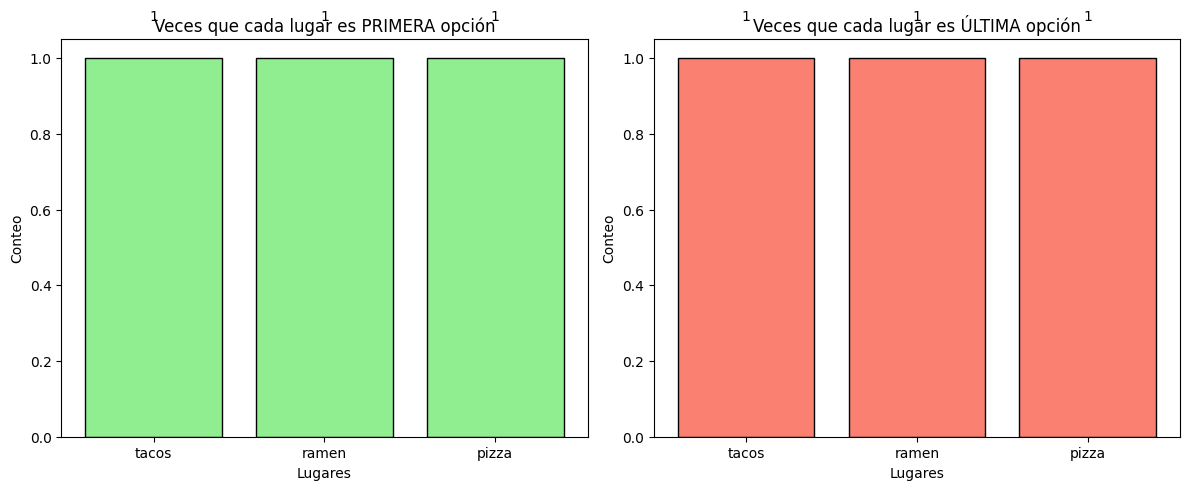


¡El sistema de inferencia decidió que iremos a comer a 'tacos'!


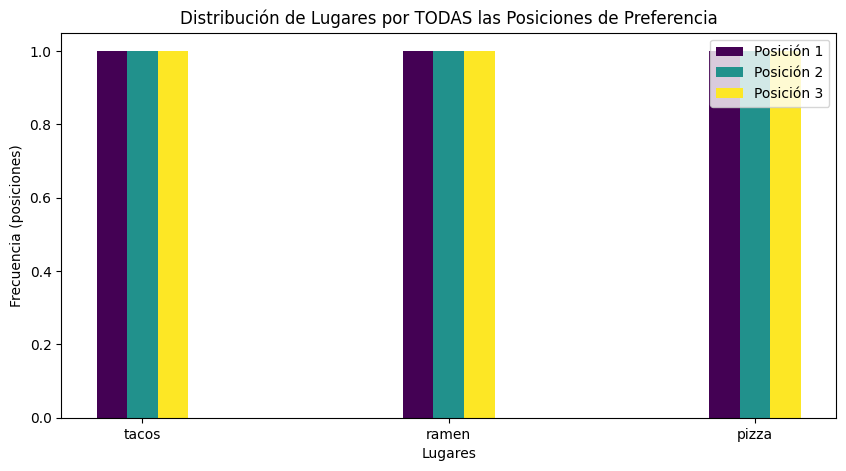

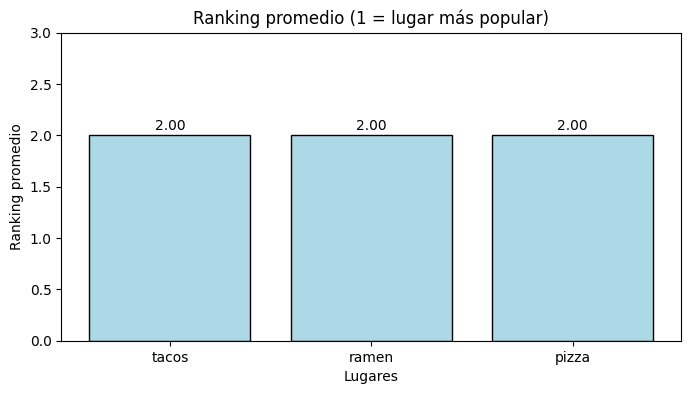

In [6]:

# Definimos los posibles lugares (nuestra "Base de Conocimientos")
possible_places = ["tacos", "ramen", "pizza"]#, "tortas", "hamburguesas"]

# Diccionario de preferencias (personas -> lista de lugares en orden de preferencia).
# Cada persona debe listar sus preferencias en el mismo orden y con la misma longitud 
# que la lista de 'possible_places'.
preferences = {
    "Alice": ["tacos", "ramen", "pizza"],# "hamburguesas", "tortas"],
    "Bob":   ["ramen", "pizza", "tacos"],# "tortas", "hamburguesas"],
    "Carole":["pizza", "tacos", "ramen"],# "tortas", "hamburguesas"],

    # Agrega más personas si lo deseas
}


# 1) Validar las preferencias
valid = validate_preferences(preferences, possible_places)

if valid:
    # 2) Visualizar las preferencias
    visualize_preferences(preferences, possible_places)
    
    # 3) Ejecutar el Inference Engine para decidir dónde comer
    chosen_place = inference_engine(preferences, possible_places)
    
    # 4) Mostrar el resultado final
    print(f"\n¡El sistema de inferencia decidió que iremos a comer a '{chosen_place}'!")
else:
    print("Por favor, corrige los errores en las preferencias y vuelve a ejecutar la celda.")

plot_all_ranks_distribution(preferences, possible_places)
visualize_average_rank(preferences, possible_places)

# Explicación del Problema con el Ejemplo de Preferencias

---

### Preferencias de los Votantes

| Votante | Primera Preferencia | Segunda Preferencia | Tercera Preferencia |
|---------|---------------------|---------------------|---------------------|
| Alice   | **Tacos**           | **Ramen**           | **Pizza**           |
| Bob     | **Ramen**           | **Pizza**           | **Tacos**           |
| Carole  | **Pizza**           | **Tacos**           | **Ramen**           |

---

**Problema:**

Si **Pizza** es elegido como el ganador, se podría argumentar que cualquier **sistema de votación justo** diría que **Ramen** debería ganar en su lugar, ya que **dos votantes (Alice y Bob)** prefieren **Ramen** sobre **Pizza**, y **solo una votante (Carole)** prefiere **Pizza** sobre **Ramen**. 

Sin embargo, aplicando el mismo argumento:
- **Tacos** es preferido sobre **Ramen**, con dos votantes (Alice y Carole) prefiriendo **Tacos**.
- **Pizza** es preferido sobre **Tacos**, con dos votantes (Bob y Carole) prefiriendo **Pizza**.

Esto crea un **círculo de preferencias**:
- **Tacos > Ramen**
- **Ramen > Pizza**
- **Pizza > Tacos**

Por lo tanto, aunque cada votante individual tiene **preferencias consistentes**, las preferencias de la sociedad son **contradictorias**: 
**Tacos** es preferido sobre **Ramen**, que es preferido sobre **Pizza**, que es preferido sobre **Tacos**.

Este fenómeno se conoce como el **Paradoja de Condorcet**, donde las preferencias agregadas de los votantes no son transitivas, lo que dificulta determinar un ganador claro mediante métodos de votación tradicionales.



# Simulemos Multiples Experimentos

,winner,winner_utility,simulation_id
0,tacos,19,1
1,pizza,20,2
2,pizza,18,3
3,hamburguesas,13,4
4,ramen,18,5


Volatilidad de ganadores: 83.84%
Índice HHI (Ganadores): 0.210


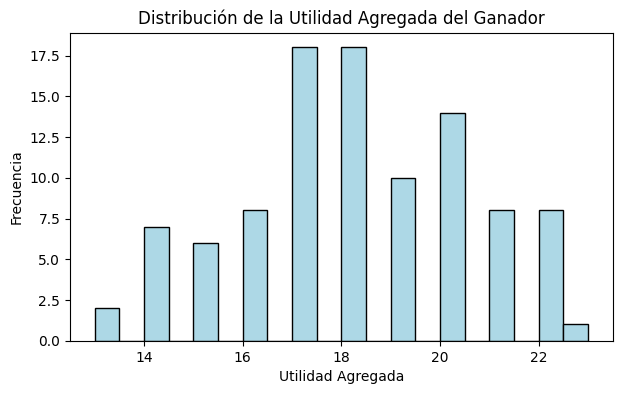

Utilidad media: 18.09, desvío estándar: 2.37


/tmp/ipykernel_35730/1848410033.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="winner", y="winner_utility", data=df_sims, palette="pastel")


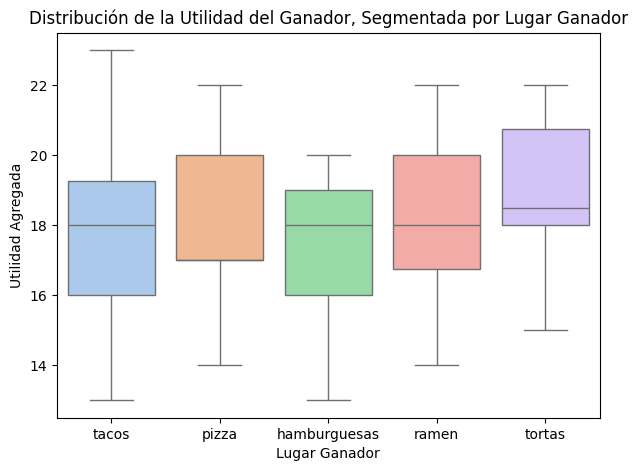

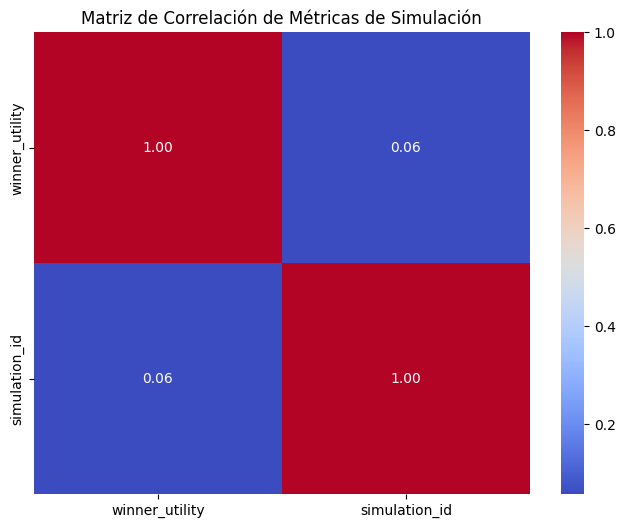

winner_utility                  
                       mean       std min max
winner                                       
hamburguesas      17.357143  2.273836  13  20
pizza             18.250000  2.244877  14  22
ramen             18.200000  2.525658  14  22
tacos             17.714286  2.594255  13  23
tortas            18.944444  1.954549  15  22

In [8]:
# 1) Parámetros de la simulación
NUM_RUNS = 100
NUM_PEOPLE = 5
my_places = ["tacos", "ramen", "pizza", "tortas", "hamburguesas"]

# 2) Ejecutar simulaciones y ver primeras filas
df_sims = run_many_simulations(NUM_RUNS, NUM_PEOPLE, my_places)
display(df_sims.head())

# 3) Análisis de coincidencias con Borda y Condorcet
results = analyze_engine_coincidence(df_sims)
engine_borda_pct = results["engine_borda_coincidence"]
engine_condorcet_pct = results["engine_condorcet_coincidence"]

print(f"Coincidencia con Borda: {engine_borda_pct:.2%}")
print(f"Coincidencia con Condorcet (sólo cuando existe): {engine_condorcet_pct:.2%}")

# 4) ¿Cuántas simulaciones tienen un Condorcet Winner?
condorcet_count = df_sims['winner_condorcet'].notna().sum()
print(f"En {condorcet_count} de {len(df_sims)} simulaciones hubo un ganador Condorcet.")

# 5) (Opcional) Ver la utilidad agregada promedio
mean_utility = df_sims["winner_utility"].mean()
std_utility = df_sims["winner_utility"].std()
print(f"Utilidad promedio del ganador (engine): {mean_utility:.2f} ± {std_utility:.2f}")
